# **Food Delivery Cost and Profitability Analysis**

---


### **Objective**

This analysis explores the cost structure, profitability, and discount strategies of a food delivery service. By evaluating key financial metrics such as order value, commission fees, delivery fees, and discounts, we aim to identify factors impacting profitability and recommend data-driven strategies to improve business performance.

### **Dataset Overview**

The dataset contains information on food delivery orders, including:
	•	Order Details: Order value, payment method, order and delivery timestamps
	•	Cost Components: Delivery fee, payment processing fee, commission fee
	•	Discounts & Offers: Percentage-based or fixed amount discounts applied to orders
	•	Profitability Metrics: Total costs, profit, and profit percentage

### **Key Analyses**
1.	Preliminary Data Cleaning & Transformation:
    - Handling missing values and formatting timestamps for time-based analysis.
    - Calculating time to deliver and correlating it with delivery fees.
	
2.	Cost & Profitability Analysis:
    - Breakdown of total costs into delivery fees, payment processing fees, and discount values.
    - Calculation of commission percentage and profit margins across different discount strategies.
	
3.	Order Patterns & Customer Behavior:
    - Identifying trends in order volume by day of the week and time of day.
    - Analyzing the impact of different payment methods on discount utilization.
	
4.	Discount Impact & Business Optimization:
    - Assessing how different discount types influence profitability and commission fees.
    - Simulating profitability under recommended discount and commission rates to optimize revenue.

### **Key Findings & Recommendations**
- Peak Order Periods: Orders peak in the evening and night hours, suggesting targeted promotions can maximize revenue.
- Discount-Driven Profitability Trends: Some discount types erode profit margins, while others help retain customers with sustainable commission structures.
- Optimized Pricing Strategy: A commission rate of ~28% and a discount cap of ~5.6% could improve profitability while maintaining customer engagement.

---

In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.io as pio

# Set default renderer for Plotly (Comment out for interactive environments)
pio.renderers.default = "png"

In [2]:
# Set default parameters
plt.rcParams.update({
    'figure.dpi': 200,            # Set the default DPI to 300
    'figure.facecolor': 'white',   # Set the default figure facecolor to white
    'axes.grid': True,           # Display grid on axes
    'grid.color': 'black',        # Set the grid color to black
    'grid.linestyle': '--',       # Set the grid line style to dashed
    'grid.linewidth': 0.5,        # Set the grid line width to 0.5
    'grid.alpha': 0.25,            # Set the grid alpha to 0.5
    'xtick.top': True,            # Display ticks on the top of the x-axis
    'xtick.bottom': True,         # Display ticks on the bottom of the x-axis
    'ytick.left': True,           # Display ticks on the left of the y-axis
    'ytick.right': True,          # Display ticks on the right of the y-axis
    'xtick.direction': 'in',       # Set the direction of x-axis ticks to 'in'
    'ytick.direction': 'in',       # Set the direction of y-axis ticks to 'in'
    'font.size': 10,              # Set the font size
    'text.usetex': False,          # Enable LaTeX rendering
    'font.family': 'serif',       # Font family for text
    'font.serif': 'Helvetica',  # Font name for serif font (Others: 'Times New Roman', 'Georgia', 'Helvetica', 'Palatino')
    'font.weight': 100,      # Font weight
    'axes.linewidth': 0.25,       # Spine line width
    'xtick.major.width': 0.25,    # Major tick line width for x-axis
    'xtick.minor.width': 0.25,    # Minor tick line width for x-axis
    'ytick.major.width': 0.25,    # Major tick line width for y-axis
    'ytick.minor.width': 0.25,     # Minor tick line width for y-axis
    'legend.frameon': True,      # Disable legend frame
})

tab_colors = list(plt.cm.tab20c.colors)

## 1. Data Loading and Preliminary Analysis

In [3]:
df = pd.read_csv("Data/food_orders_new_delhi.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Order ID                1000 non-null   int64 
 1   Customer ID             1000 non-null   object
 2   Restaurant ID           1000 non-null   object
 3   Order Date and Time     1000 non-null   object
 4   Delivery Date and Time  1000 non-null   object
 5   Order Value             1000 non-null   int64 
 6   Delivery Fee            1000 non-null   int64 
 7   Payment Method          1000 non-null   object
 8   Discounts and Offers    815 non-null    object
 9   Commission Fee          1000 non-null   int64 
 10  Payment Processing Fee  1000 non-null   int64 
 11  Refunds/Chargebacks     1000 non-null   int64 
dtypes: int64(6), object(6)
memory usage: 93.9+ KB


In [5]:
df.isnull().sum()

Order ID                    0
Customer ID                 0
Restaurant ID               0
Order Date and Time         0
Delivery Date and Time      0
Order Value                 0
Delivery Fee                0
Payment Method              0
Discounts and Offers      185
Commission Fee              0
Payment Processing Fee      0
Refunds/Chargebacks         0
dtype: int64

In [6]:
# Remove the rows where "Discounts and Offers" is null
df = df.fillna("No Discount")

In [7]:
# Convert "Order Date and Time" to datetime
df["Order DateTime"] = pd.to_datetime(df["Order Date and Time"])
df["Delivery DateTime"] = pd.to_datetime(df["Delivery Date and Time"])
df['Order Day'] = df['Order DateTime'].dt.day_name()

In [8]:
df

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Order DateTime,Delivery DateTime,Order Day
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0,2024-02-01 01:11:52,2024-02-01 02:39:52,Thursday
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0,2024-02-02 22:11:04,2024-02-02 22:46:04,Friday
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0,2024-01-31 05:54:35,2024-01-31 06:52:35,Wednesday
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,No Discount,146,27,0,2024-01-16 22:52:49,2024-01-16 23:38:49,Tuesday
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0,2024-01-29 01:19:30,2024-01-29 02:48:30,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,C6232,R2129,2024-01-14 05:57:00,2024-01-14 06:39:00,825,0,Digital Wallet,5% on App,165,47,50,2024-01-14 05:57:00,2024-01-14 06:39:00,Sunday
996,997,C6797,R2742,2024-01-28 08:50:43,2024-01-28 10:10:43,1627,50,Cash on Delivery,No Discount,110,42,0,2024-01-28 08:50:43,2024-01-28 10:10:43,Sunday
997,998,C5926,R2837,2024-01-21 09:43:19,2024-01-21 10:44:19,553,20,Cash on Delivery,No Discount,64,31,0,2024-01-21 09:43:19,2024-01-21 10:44:19,Sunday
998,999,C7016,R2144,2024-01-30 22:23:38,2024-01-31 00:07:38,1414,0,Cash on Delivery,15% New User,199,34,0,2024-01-30 22:23:38,2024-01-31 00:07:38,Tuesday


In [9]:
df["Time to Deliver"] = df["Delivery DateTime"] - df["Order DateTime"]
df["Time to Deliver"] = df["Time to Deliver"].dt.total_seconds() / 60 # In minutes

In [10]:
# Check if delivery fee is proportional to the time taken to deliver
df["Delivery Fee"].corr(df["Time to Deliver"])

0.0014146961457020988

In [11]:
df["Discounts and Offers"].value_counts()

Discounts and Offers
10%             233
50 off Promo    201
15% New User    198
No Discount     185
5% on App       183
Name: count, dtype: int64

In [12]:
def get_discounts(row):
    discount = row['Discounts and Offers']
    order_value = row['Order Value']
    if 'off' in discount:
        return float(discount.split(" ")[0]) / order_value * 100
    elif '%' in discount:
        return float(discount.split("%")[0])
    else:
        return 0.0

df["Discounts (%)"] = df.apply(get_discounts, axis=1)
df["Discount value"] = df["Order Value"] * df["Discounts (%)"] / 100

In [13]:
discounts_list = df['Discounts and Offers'].value_counts().index.tolist()

In [14]:
df['Payment Method'].value_counts()

Payment Method
Cash on Delivery    357
Credit Card         337
Digital Wallet      306
Name: count, dtype: int64

In [15]:
df['Commission Percentage'] = df['Commission Fee'] / df['Order Value'] * 100

## Cost and Profitability Analysis

In [16]:
df['Total Costs'] = df['Payment Processing Fee'] + df['Delivery Fee'] + df['Discount value']
df['Profit'] = df['Commission Fee'] - df['Total Costs']
df['Profit Percentage'] = df['Profit'] / df['Total Costs'] * 100

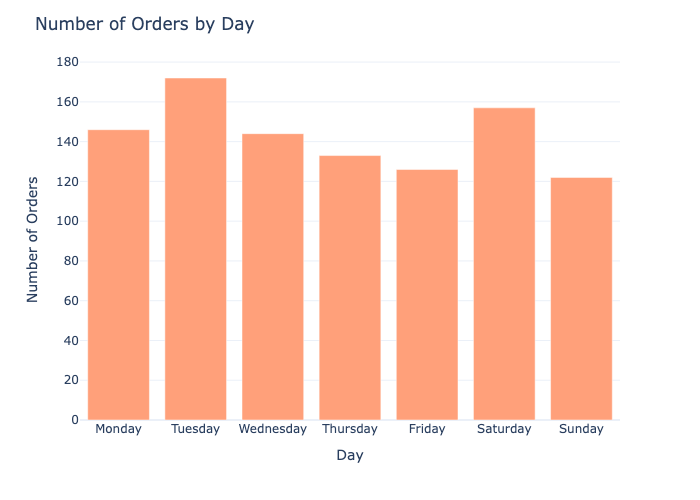

In [17]:

# Define the correct order of weekdays
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Count orders per day and reset index
order_counts = df['Order Day'].value_counts().reset_index()

# Rename columns for clarity
order_counts.columns = ['Order Day', 'Number of Orders']

# Convert 'Order Day' to categorical type with ordered days
order_counts['Order Day'] = pd.Categorical(order_counts['Order Day'], categories=weekday_order, ordered=True)

# Sort by weekday order
order_counts = order_counts.sort_values('Order Day')
fig = px.bar(order_counts, x='Order Day', y='Number of Orders', labels={'Order Day': 'Day', 'Number of Orders': 'Number of Orders'}, color_discrete_sequence=['#FFA07A'])

fig.update_layout(title='Number of Orders by Day', template='plotly_white')
fig.show()

In [18]:
def sort_order_time(hour):
    if 5 <= hour < 12:
        return "Morning"
    elif 12 <= hour < 16:
        return "Afternoon"
    elif 16 <= hour < 20:
        return "Evening"
    elif 20 <= hour < 24:
        return "Night"
    else:
        return "Midnight"
    
df['Order Time'] = df['Order DateTime'].dt.hour.apply(sort_order_time)

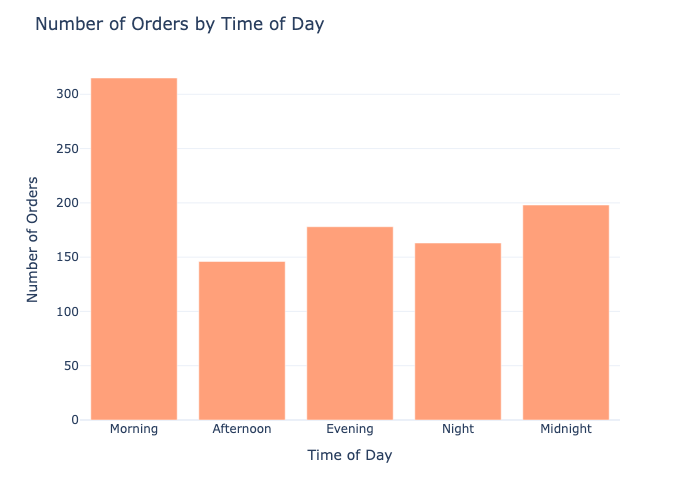

In [19]:
# Plot the number of orders by time of day
order_time = df['Order Time'].value_counts().reset_index()

order_time.columns = ['Order Time', 'Number of Orders']

order_time['Order Time'] = pd.Categorical(order_time['Order Time'], categories=['Morning', 'Afternoon', 'Evening', 'Night', 'Midnight'], ordered=True)

order_time = order_time.sort_values('Order Time')

fig = px.bar(order_time, x='Order Time', y='Number of Orders', labels={'Order Time': 'Time of Day', 'Number of Orders': 'Number of Orders'}, color_discrete_sequence=['#FFA07A'])

fig.update_layout(title='Number of Orders by Time of Day', template='plotly_white')
fig.show()

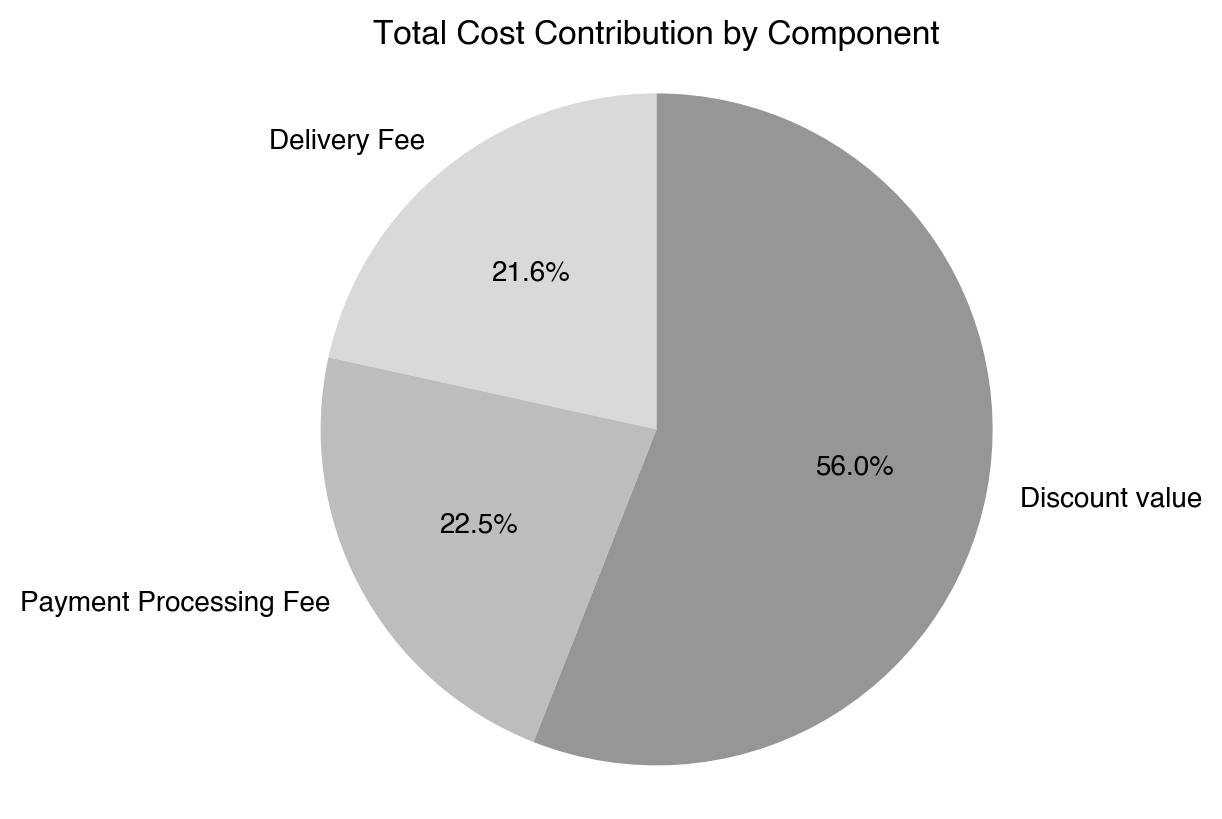

In [20]:
# Donut plot for total cost contribution by each component using matplotlib
total_costs = df[['Delivery Fee', 'Payment Processing Fee', 'Discount value']].sum()

fig, ax = plt.subplots()
ax.pie(total_costs, labels=total_costs.index, autopct='%1.1f%%', startangle=90, colors=tab_colors[:3:-1])
ax.axis('equal')
plt.title('Total Cost Contribution by Component')
plt.show()

In [21]:
df.groupby("Payment Method")["Discount value"].mean()

Payment Method
Cash on Delivery    78.012045
Credit Card         74.278932
Digital Wallet      69.959314
Name: Discount value, dtype: float64

In [22]:
# aggregate data to get overall metrics
total_orders = df.shape[0]
total_revenue = df['Commission Fee'].sum()
total_costs = df['Total Costs'].sum()
total_profit = df['Profit'].sum()
average_profit = round(total_profit/total_orders)

overall_metrics = {
    "Total Orders": total_orders,
    "Total Revenue": total_revenue,
    "Total Costs": total_costs,
    "Total Profit": total_profit,
    "Average Profit": average_profit
}

print(overall_metrics)

{'Total Orders': 1000, 'Total Revenue': 126990, 'Total Costs': 132741.84999999998, 'Total Profit': -5751.85, 'Average Profit': -6}


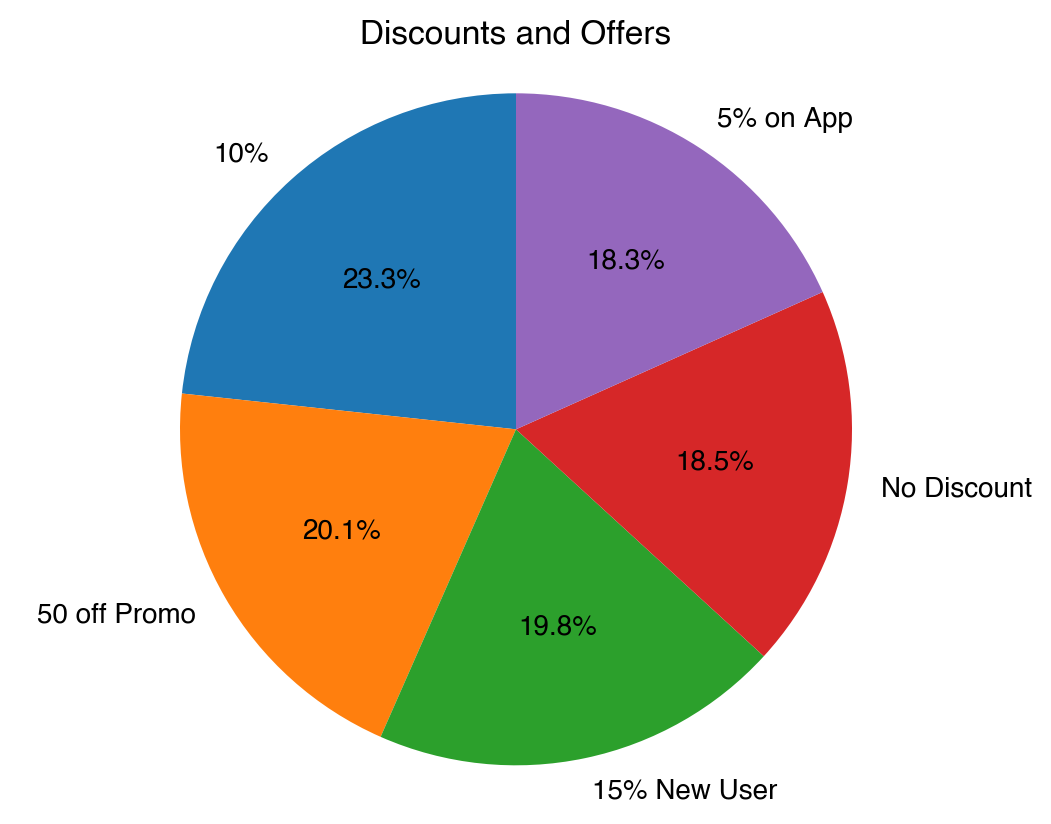

In [23]:
# Plot pie chart for discounts and offers using matplotlib
order_discounts = df['Discounts and Offers'].value_counts().reset_index()

order_discounts.columns = ['Discounts and Offers', 'Number of Orders']

fig, ax = plt.subplots()
ax.pie(order_discounts['Number of Orders'], labels=order_discounts['Discounts and Offers'], autopct='%1.1f%%', startangle=90) #, colors=tab_colors[:3:-1])
ax.axis('equal')
plt.title('Discounts and Offers')
plt.show()

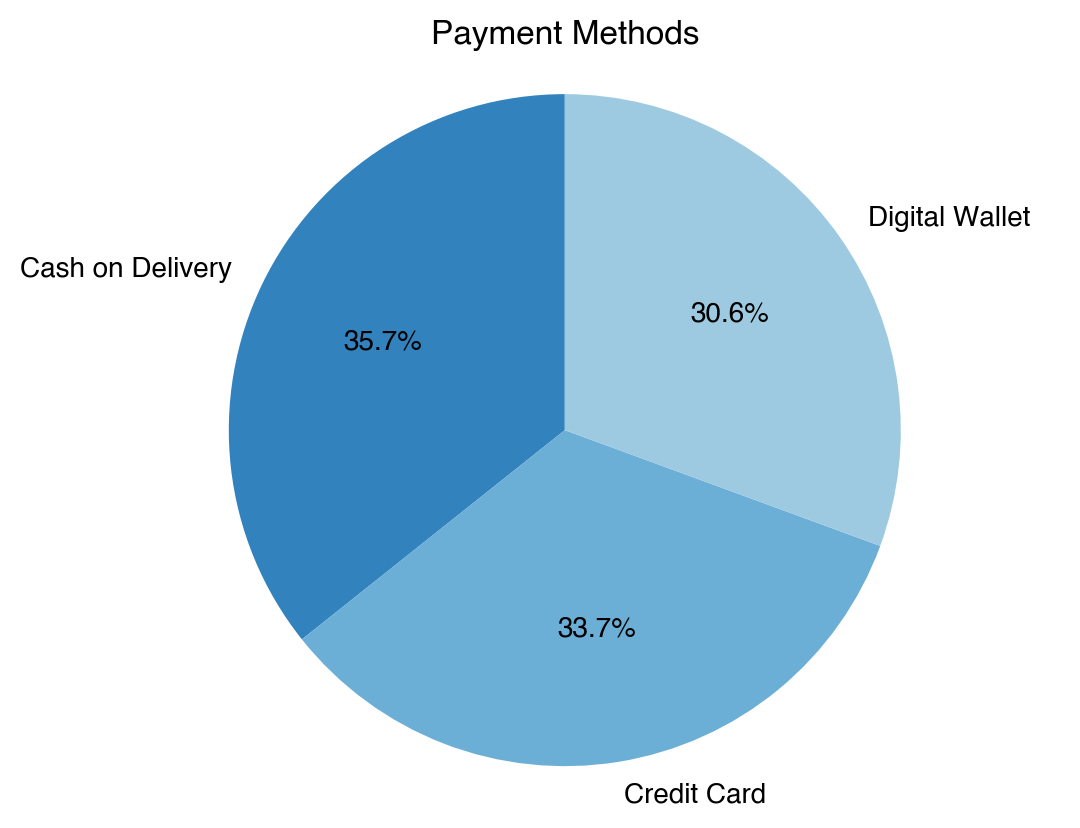

In [24]:
# Plot pie chart for payment methods using matplotlib
payment_methods = df['Payment Method'].value_counts().reset_index()

payment_methods.columns = ['Payment Method', 'Number of Orders']

fig, ax = plt.subplots()
ax.pie(payment_methods['Number of Orders'], labels=payment_methods['Payment Method'], autopct='%1.1f%%', startangle=90, colors=tab_colors[:3])
ax.axis('equal')
plt.title('Payment Methods')
plt.show()

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Order ID                1000 non-null   int64         
 1   Customer ID             1000 non-null   object        
 2   Restaurant ID           1000 non-null   object        
 3   Order Date and Time     1000 non-null   object        
 4   Delivery Date and Time  1000 non-null   object        
 5   Order Value             1000 non-null   int64         
 6   Delivery Fee            1000 non-null   int64         
 7   Payment Method          1000 non-null   object        
 8   Discounts and Offers    1000 non-null   object        
 9   Commission Fee          1000 non-null   int64         
 10  Payment Processing Fee  1000 non-null   int64         
 11  Refunds/Chargebacks     1000 non-null   int64         
 12  Order DateTime          1000 non-null   datetime6

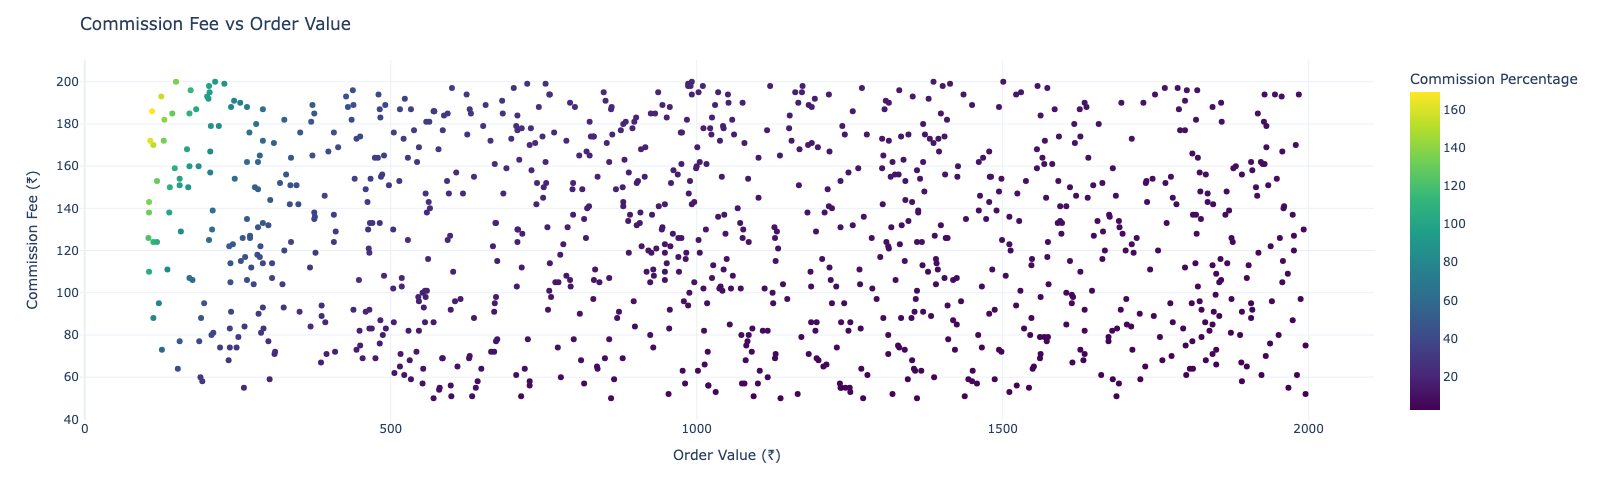

In [26]:
# Commission fee vs order value
fig = px.scatter(df, x='Order Value', y='Commission Fee', color='Commission Percentage', labels={'Commission Fee': 'Commission Fee (₹)', 'Order Value': 'Order Value (₹)'}, color_continuous_scale='viridis')

fig.update_layout(title='Commission Fee vs Order Value', template='plotly_white', width=1600)
fig.show()

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Order ID                1000 non-null   int64         
 1   Customer ID             1000 non-null   object        
 2   Restaurant ID           1000 non-null   object        
 3   Order Date and Time     1000 non-null   object        
 4   Delivery Date and Time  1000 non-null   object        
 5   Order Value             1000 non-null   int64         
 6   Delivery Fee            1000 non-null   int64         
 7   Payment Method          1000 non-null   object        
 8   Discounts and Offers    1000 non-null   object        
 9   Commission Fee          1000 non-null   int64         
 10  Payment Processing Fee  1000 non-null   int64         
 11  Refunds/Chargebacks     1000 non-null   int64         
 12  Order DateTime          1000 non-null   datetime6

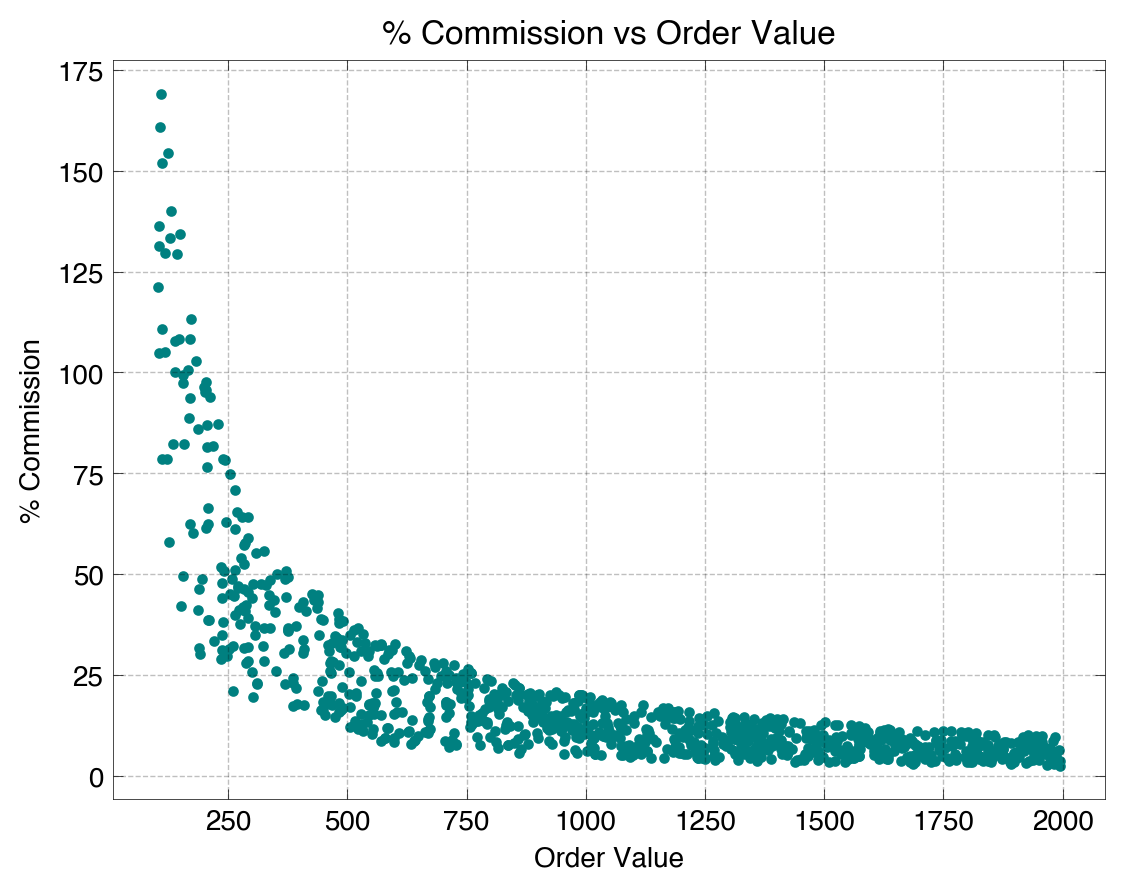

In [28]:
# Commission Percentage vs Order Value (matplotlib)

fig, ax = plt.subplots()
scatter = ax.scatter(df['Order Value'], df['Commission Percentage'], s=8, color='teal')
plt.xlabel('Order Value')
plt.ylabel(r'% Commission')
plt.title(r'% Commission vs Order Value')
plt.show()

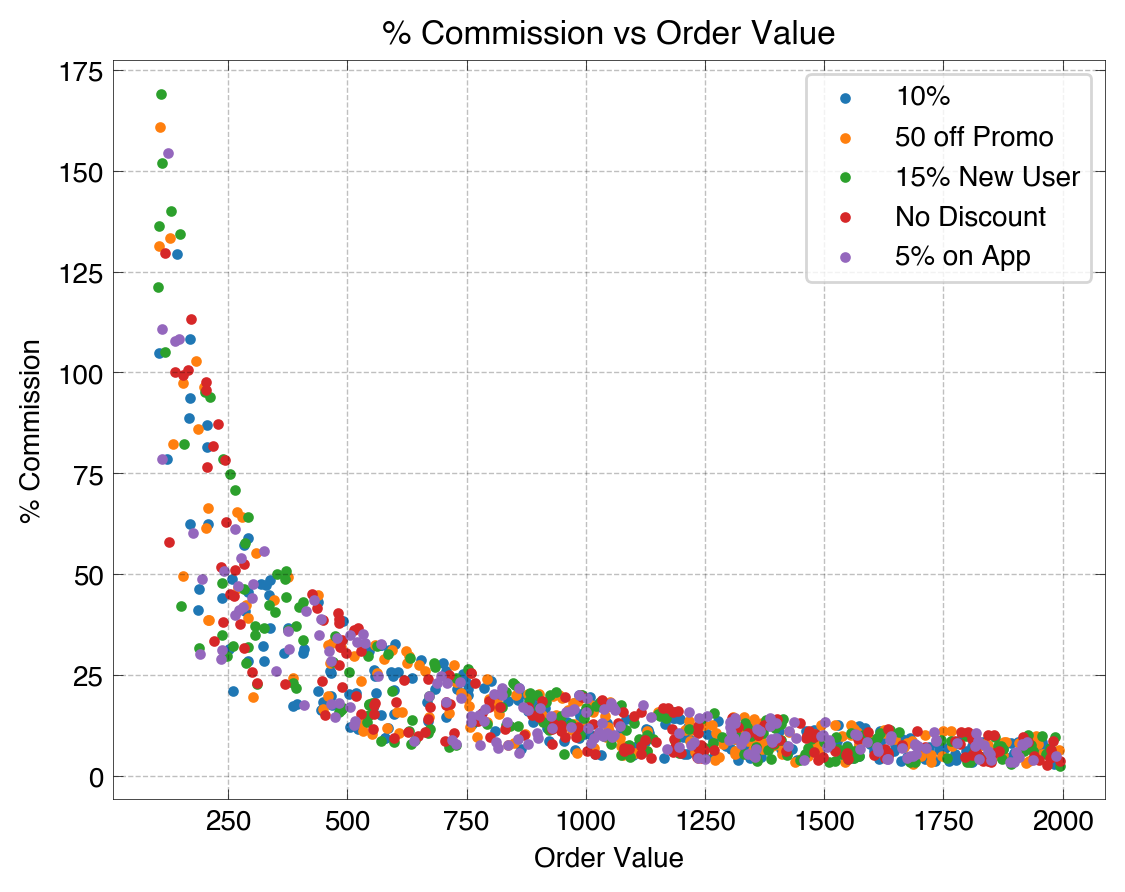

In [29]:
# Commission Percentage vs Order Value (matplotlib)

fig, ax = plt.subplots()
for discount_type in discounts_list:
    ax.scatter(df[df['Discounts and Offers'] == discount_type]['Order Value'], df[df['Discounts and Offers'] == discount_type]['Commission Percentage'], s=8, label=discount_type)
# scatter = ax.scatter(df['Order Value'], df['Commission Percentage'], s=8, color='teal')
plt.legend()
plt.xlabel('Order Value')
plt.ylabel('% Commission')
plt.title('% Commission vs Order Value')
plt.show()

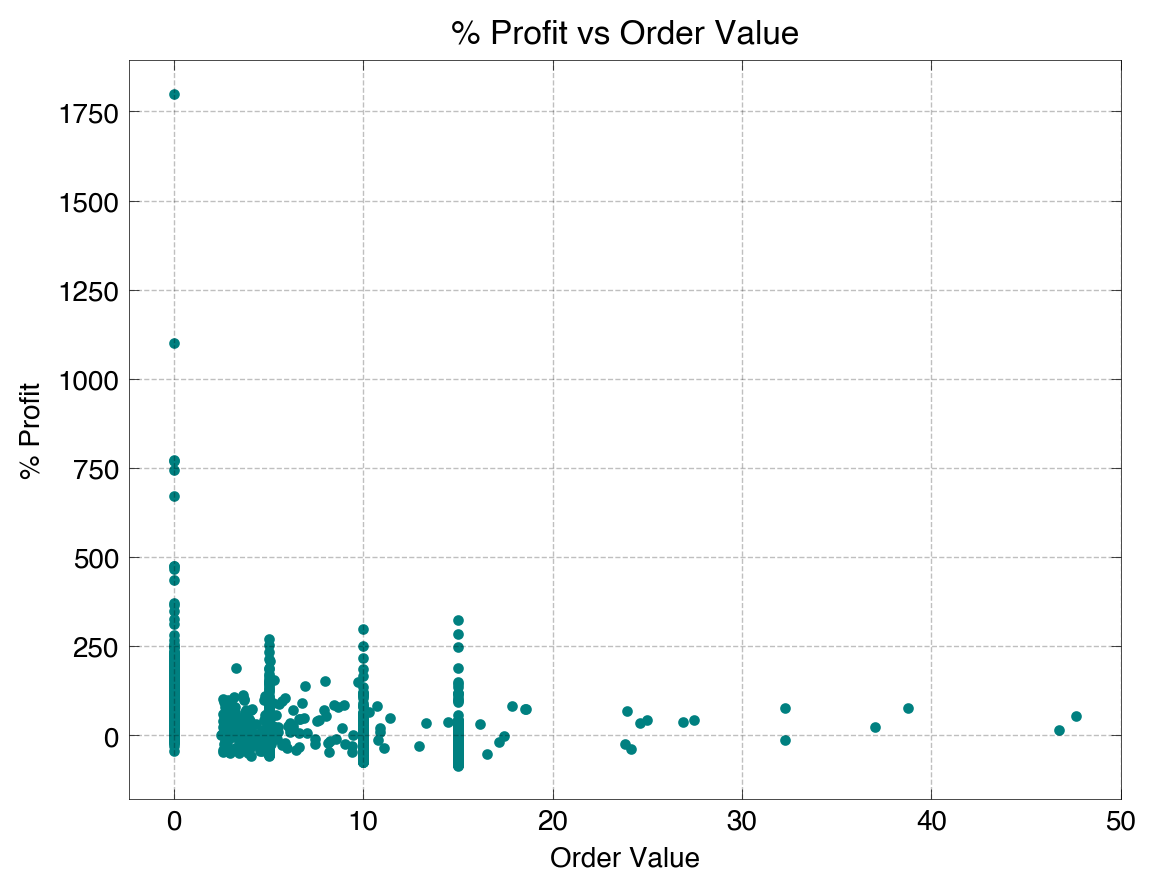

In [30]:
# Profit Percentage vs Order Value (matplotlib)

fig, ax = plt.subplots()
scatter = ax.scatter(df['Discounts (%)'], df['Profit Percentage'], s=8, color='teal')
plt.xlabel('Order Value')
plt.ylabel('% Profit')
plt.title('% Profit vs Order Value')
plt.show()

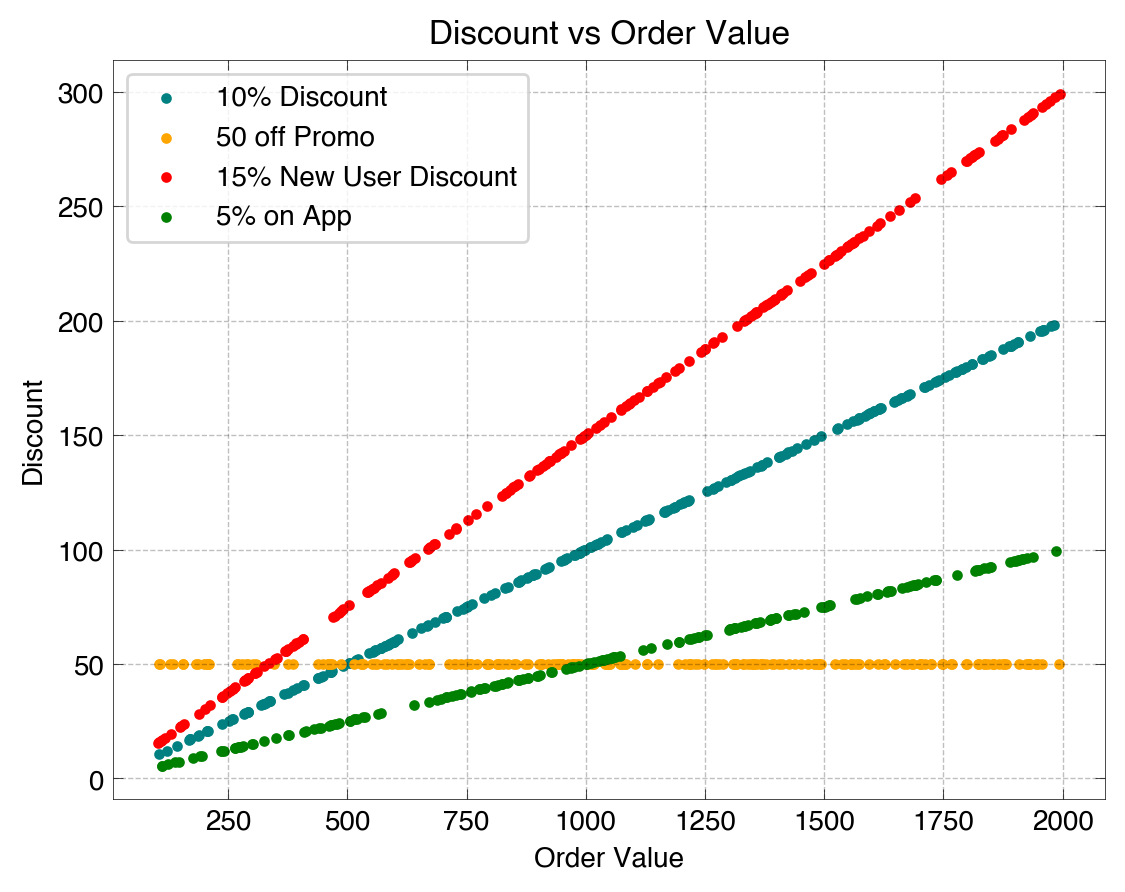

In [31]:
# Discounts (%) vs Order Value (matplotlib)

fig, ax = plt.subplots()
ax.scatter(df[df['Discounts and Offers'] == '10%']['Order Value'], df[df['Discounts and Offers'] == '10%']['Discount value'], s=8, color='teal', label='10% Discount')
ax.scatter(df[df['Discounts and Offers'] == '50 off Promo']['Order Value'], df[df['Discounts and Offers'] == '50 off Promo']['Discount value'], s=8, color='orange', label='50 off Promo')
ax.scatter(df[df['Discounts and Offers'] == '15% New User']['Order Value'], df[df['Discounts and Offers'] == '15% New User']['Discount value'], s=8, color='red', label='15% New User Discount')
ax.scatter(df[df['Discounts and Offers'] == '5% on App']['Order Value'], df[df['Discounts and Offers'] == '5% on App']['Discount value'], s=8, color='green', label='5% on App')
plt.xlabel('Order Value')
plt.ylabel('Discount')
plt.title('Discount vs Order Value')
plt.legend()
plt.show()

In [32]:
df.groupby("Discounts and Offers")["Order Value"].mean()

Discounts and Offers
10%             1053.755365
15% New User    1008.070707
5% on App       1065.316940
50 off Promo    1094.706468
No Discount     1047.875676
Name: Order Value, dtype: float64

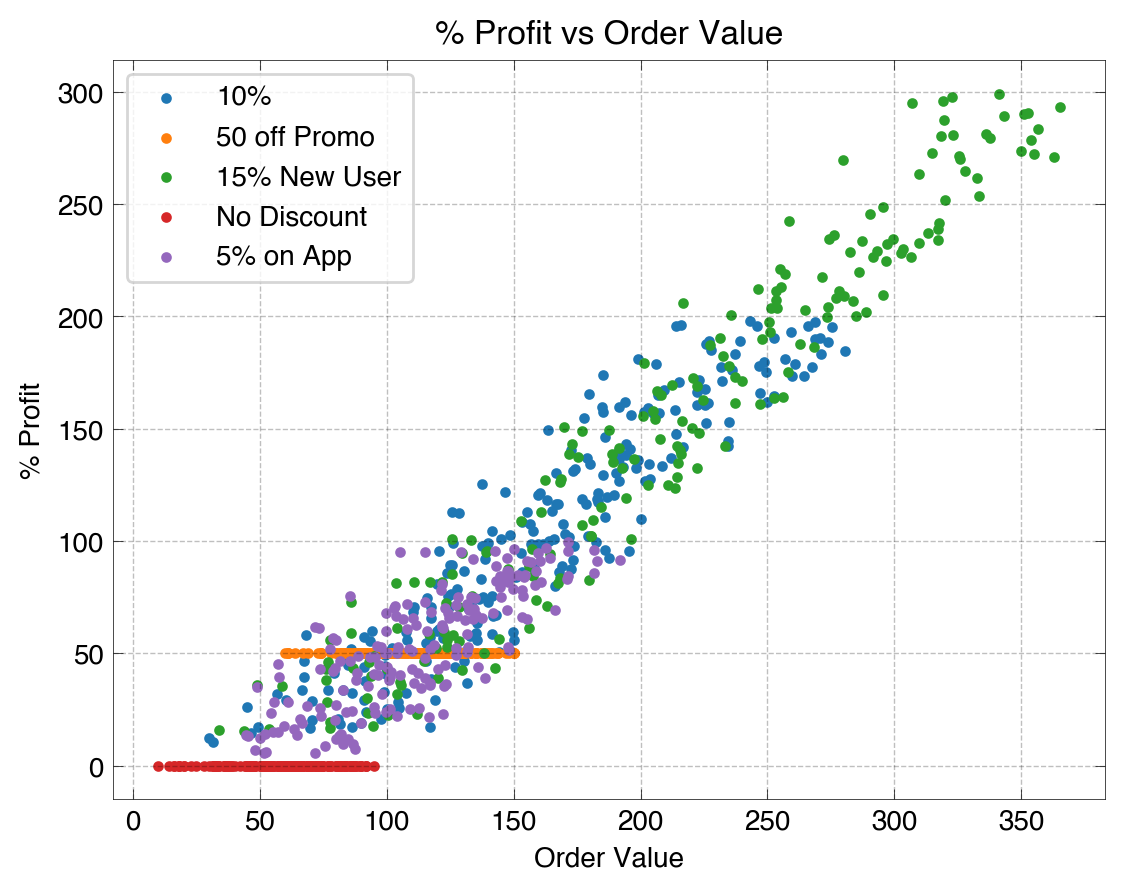

In [33]:
# Discounts (%) vs Order Value (matplotlib)

fig, ax = plt.subplots()
for discount_type in discounts_list:
    ax.scatter(df[df['Discounts and Offers'] == discount_type]['Total Costs'], df[df['Discounts and Offers'] == discount_type]['Discount value'], s=8, label=discount_type)
# ax.scatter(df['Total Costs'], df['Discount value'], s=8, color='teal')
plt.xlabel('Order Value')
plt.ylabel('% Profit')
plt.title('% Profit vs Order Value')
plt.legend()
plt.show()

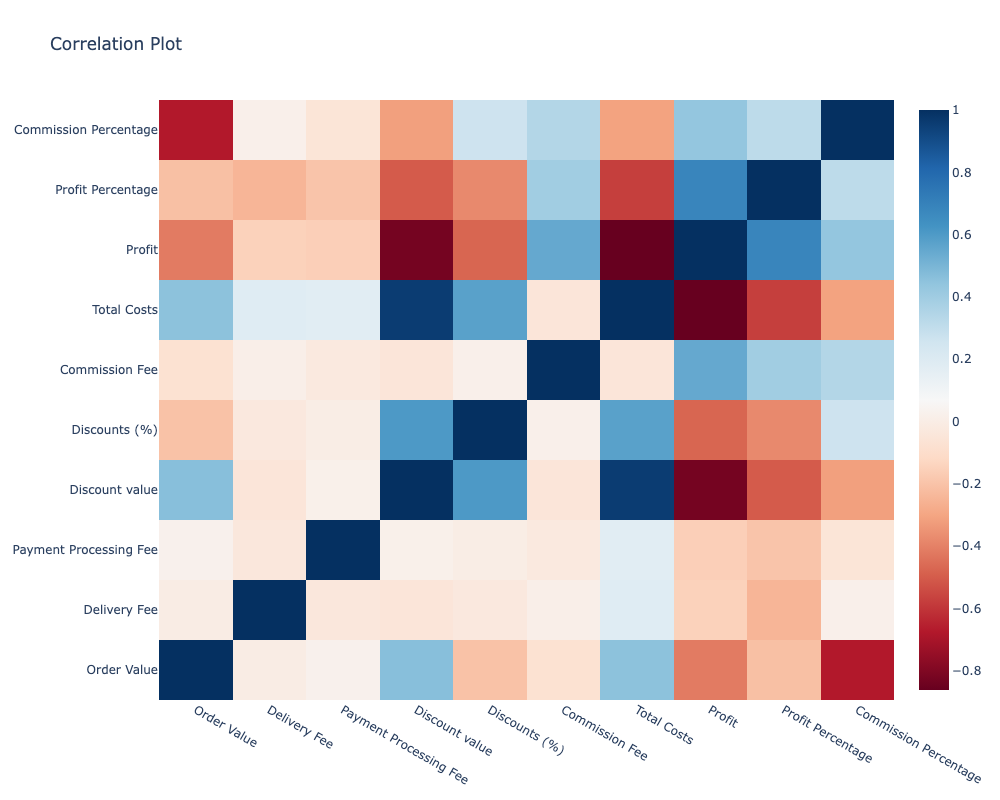

In [34]:
# Correlation plot for numerical columns only

correlation = df[['Order Value', 'Delivery Fee', 'Payment Processing Fee', 'Discount value', 'Discounts (%)', 'Commission Fee', 'Total Costs', 'Profit', 'Profit Percentage', 'Commission Percentage']].corr()

fig = go.Figure(data=go.Heatmap(z=correlation.values, x=correlation.index, y=correlation.columns, colorscale='RdBu'))

fig.update_layout(title='Correlation Plot', template='plotly_white', width=1000, height=800) 
fig.show()

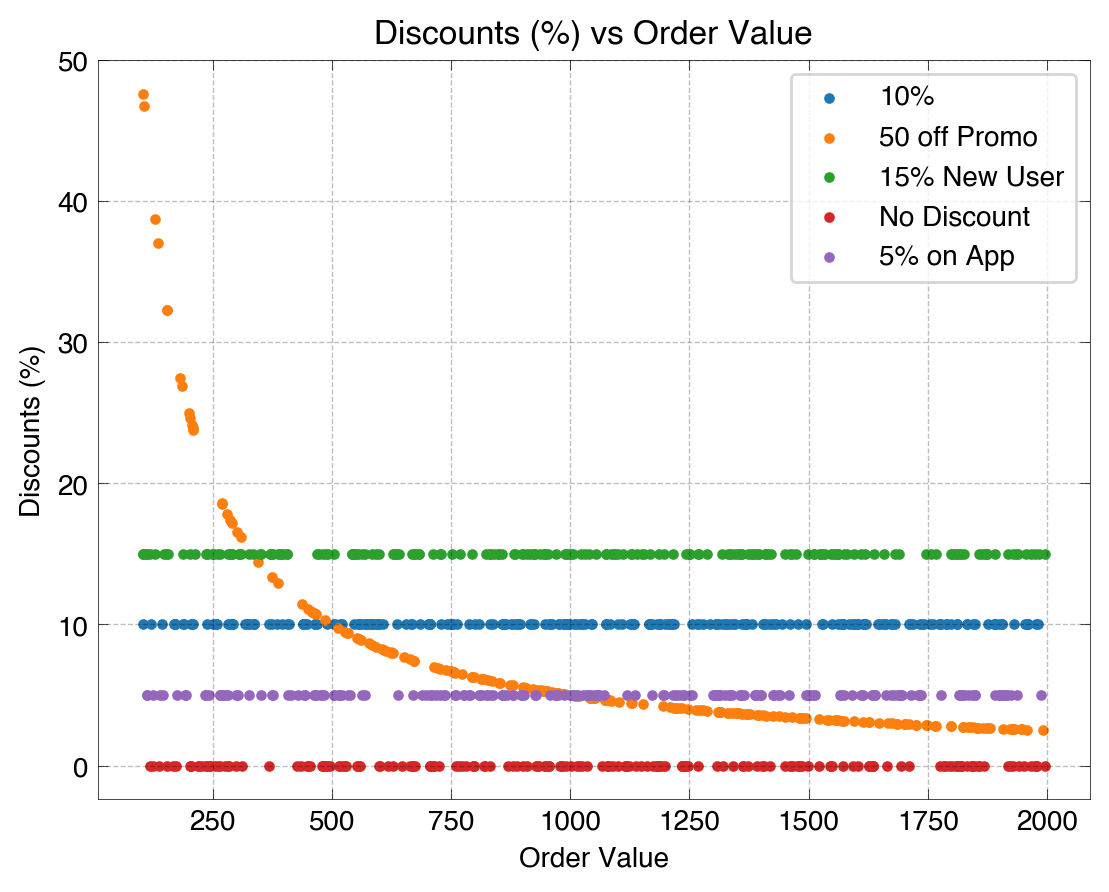

In [35]:
# Matplotlib scatter plot for commission fee vs order value
fig, ax = plt.subplots()

for discount_type in discounts_list:
    ax.scatter(df[df['Discounts and Offers'] == discount_type]['Order Value'], df[df['Discounts and Offers'] == discount_type]['Discounts (%)'], s=8, label=discount_type)

# scatter = ax.scatter(df['Order Value'], df['Discounts (%)'], s=8)
ax.set_xlabel('Order Value')
ax.set_ylabel(r'Discounts (%)')
ax.set_title(r'Discounts (%) vs Order Value')
plt.legend()
# fig.colorbar(scatter, label='Commission Percentage')
plt.show()  

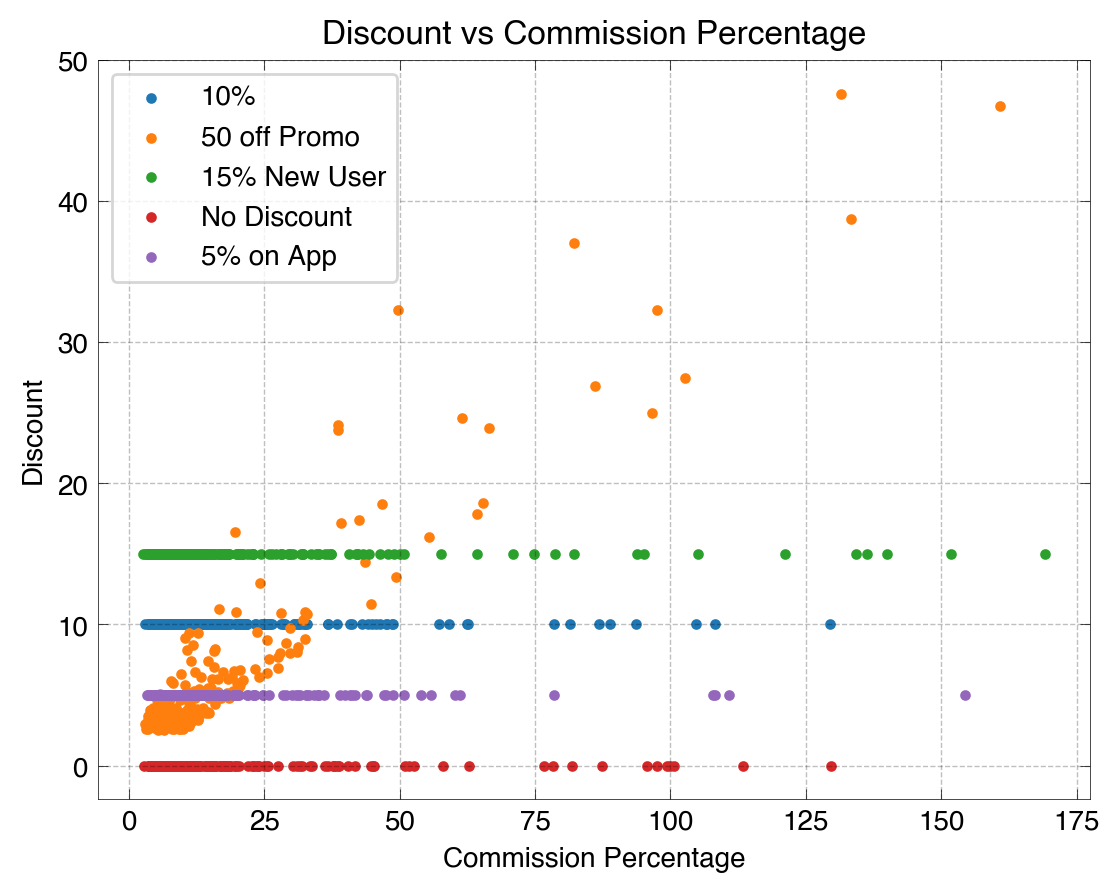

In [36]:
fig, ax = plt.subplots()
for discount_type in discounts_list:
    ax.scatter(df[df['Discounts and Offers'] == discount_type]['Commission Percentage'], df[df['Discounts and Offers'] == discount_type]['Discounts (%)'], s=8, label=discount_type)
plt.legend()
ax.set_xlabel('Commission Percentage')
ax.set_ylabel('Discount')
ax.set_title('Discount vs Commission Percentage')
plt.show()

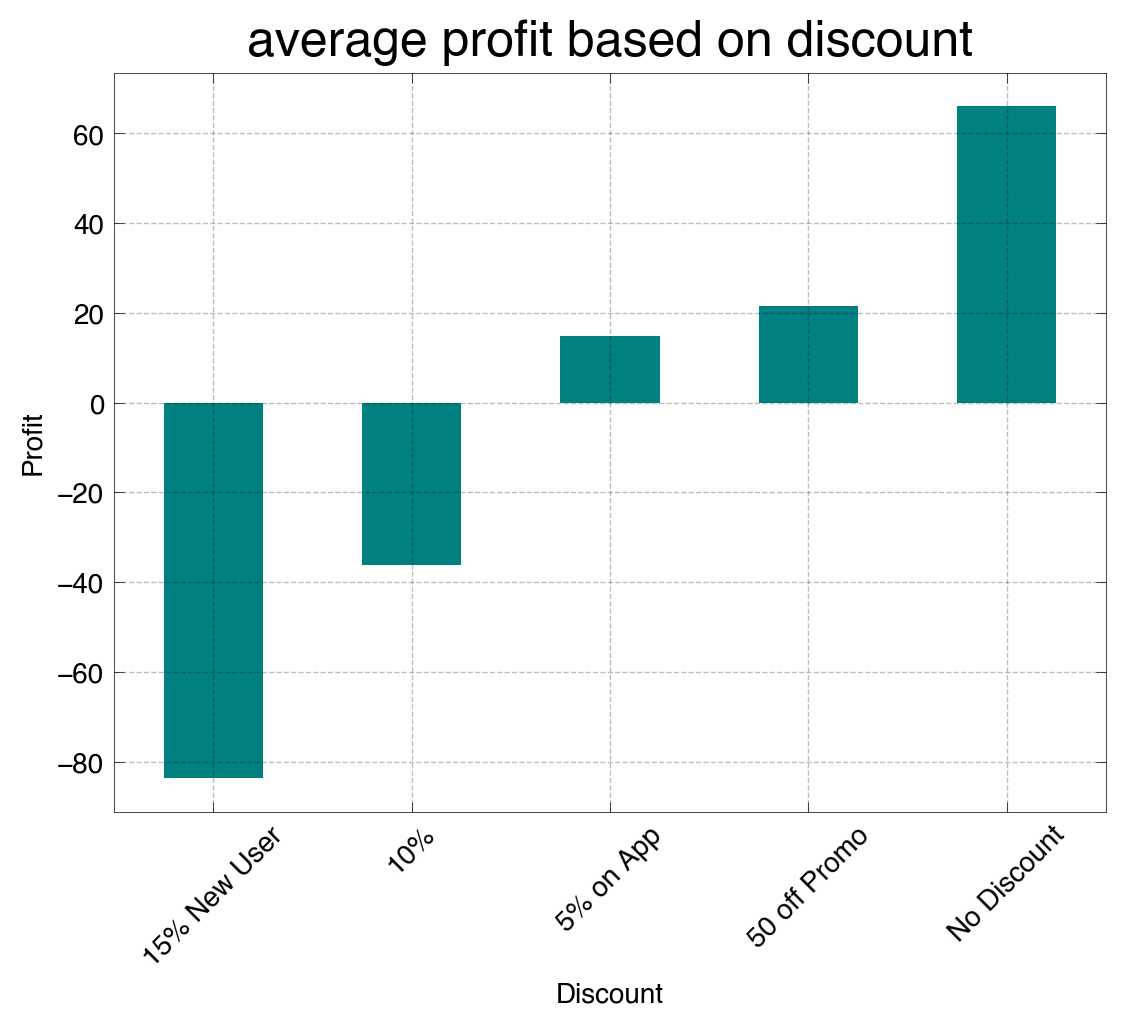

In [37]:
avg_profit = df.groupby('Discounts and Offers')['Profit'].mean().sort_values()
avg_profit.plot(kind='bar',color='teal')
plt.title('average profit based on discount',fontsize = 18,fontweight='bold')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.xticks(rotation = 45)
plt.show()

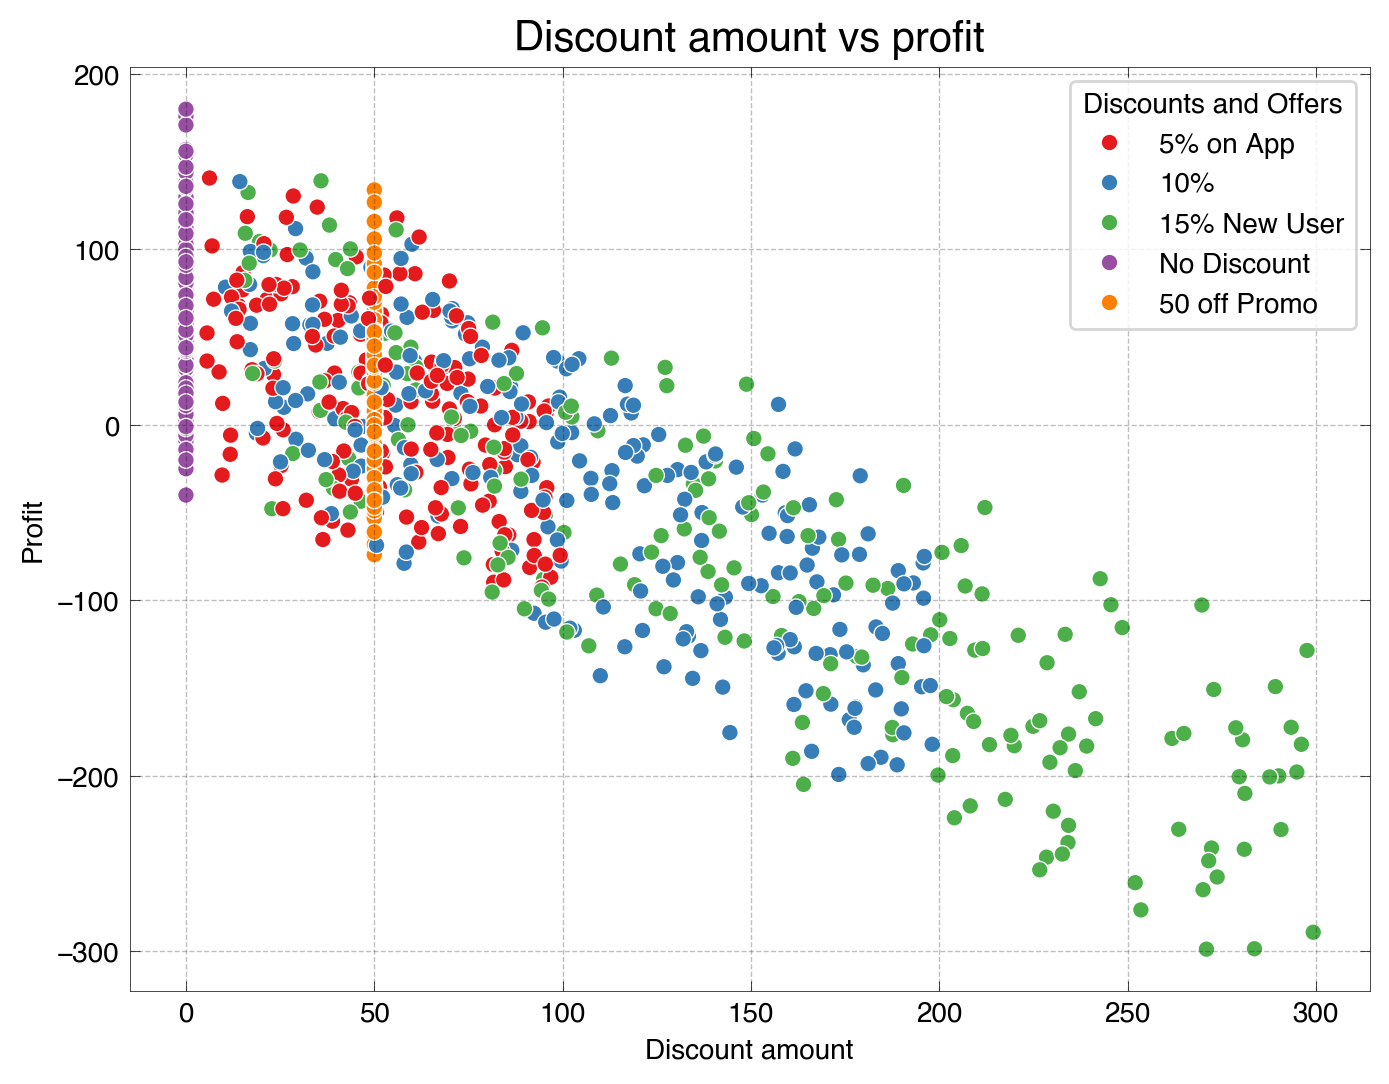

In [38]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Discount value',y='Profit',data=df,hue='Discounts and Offers', palette='Set1')
plt.title('Discount amount vs profit',fontsize = 15)
plt.ylabel('Profit')
plt.xlabel('Discount amount')
plt.show()

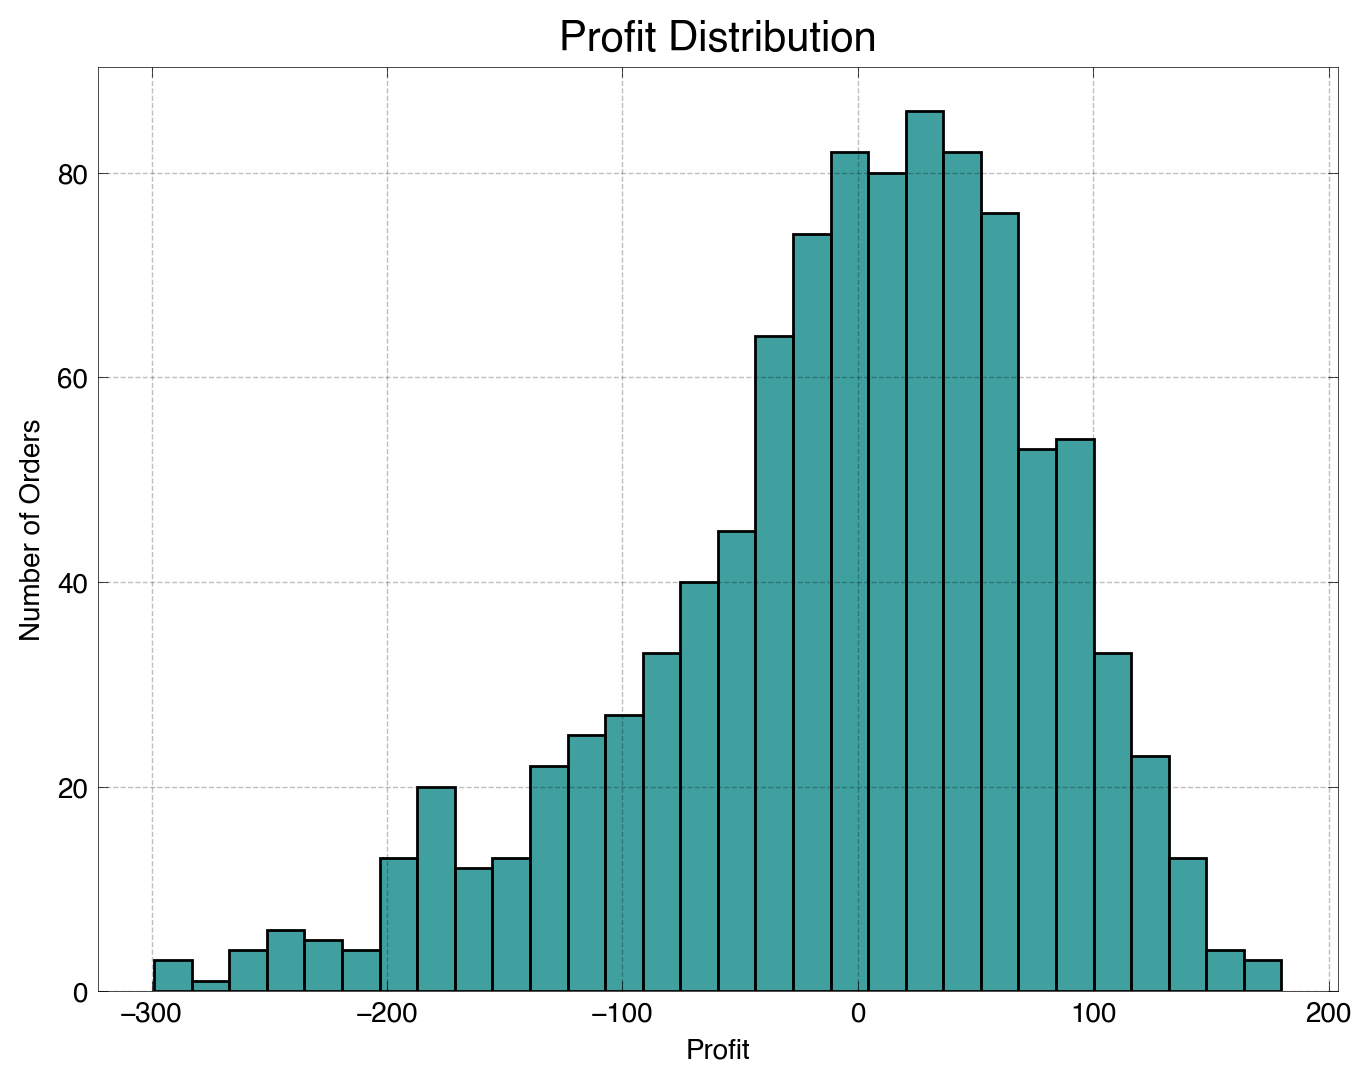

In [39]:
# histogram for profit
plt.figure(figsize=(8,6))
sns.histplot(df['Profit'], bins=30, color='teal')
plt.title('Profit Distribution',fontsize = 15)
plt.xlabel('Profit')
plt.ylabel('Number of Orders')
plt.show()

In [40]:
print(f'Average Profit: {df["Profit"].mean()}')
print(f'Average Profit Percentage: {df["Profit Percentage"].mean()}')

Average Profit: -5.75185
Average Profit Percentage: 31.11887475692026


## New approach to make business profitable

In [41]:
df['Commission Percentage'].describe()

count    1000.000000
mean       19.750890
std        22.656244
min         2.606516
25%         7.762474
50%        12.024619
75%        20.710796
max       169.090909
Name: Commission Percentage, dtype: float64

In [42]:
# Finding the profitable orders while keeping the commission percentage below 19% (Average Commission Percentage)
profitable_orders = df[(df['Profit'] > 0) | (df['Commission Percentage'] <= 19)]

profit_com_percent = profitable_orders['Commission Fee'] / profitable_orders['Order Value'] * 100
print(f"New commission percentage: {profit_com_percent.mean():.3f}%")

profit_discounts_percent = profitable_orders['Discounts (%)']
print(f"New discounts percentage: {profit_discounts_percent.mean():.3f}%")

New commission percentage: 19.365%
New discounts percentage: 7.406%


In [43]:
# Earlier commission percentage and discount percentage
print(f"Earlier commission percentage: {df['Commission Percentage'].mean():.3f}%")
print(f"Earlier discounts percentage: {df['Discounts (%)'].mean():.3f}%")

Earlier commission percentage: 19.751%
Earlier discounts percentage: 7.655%


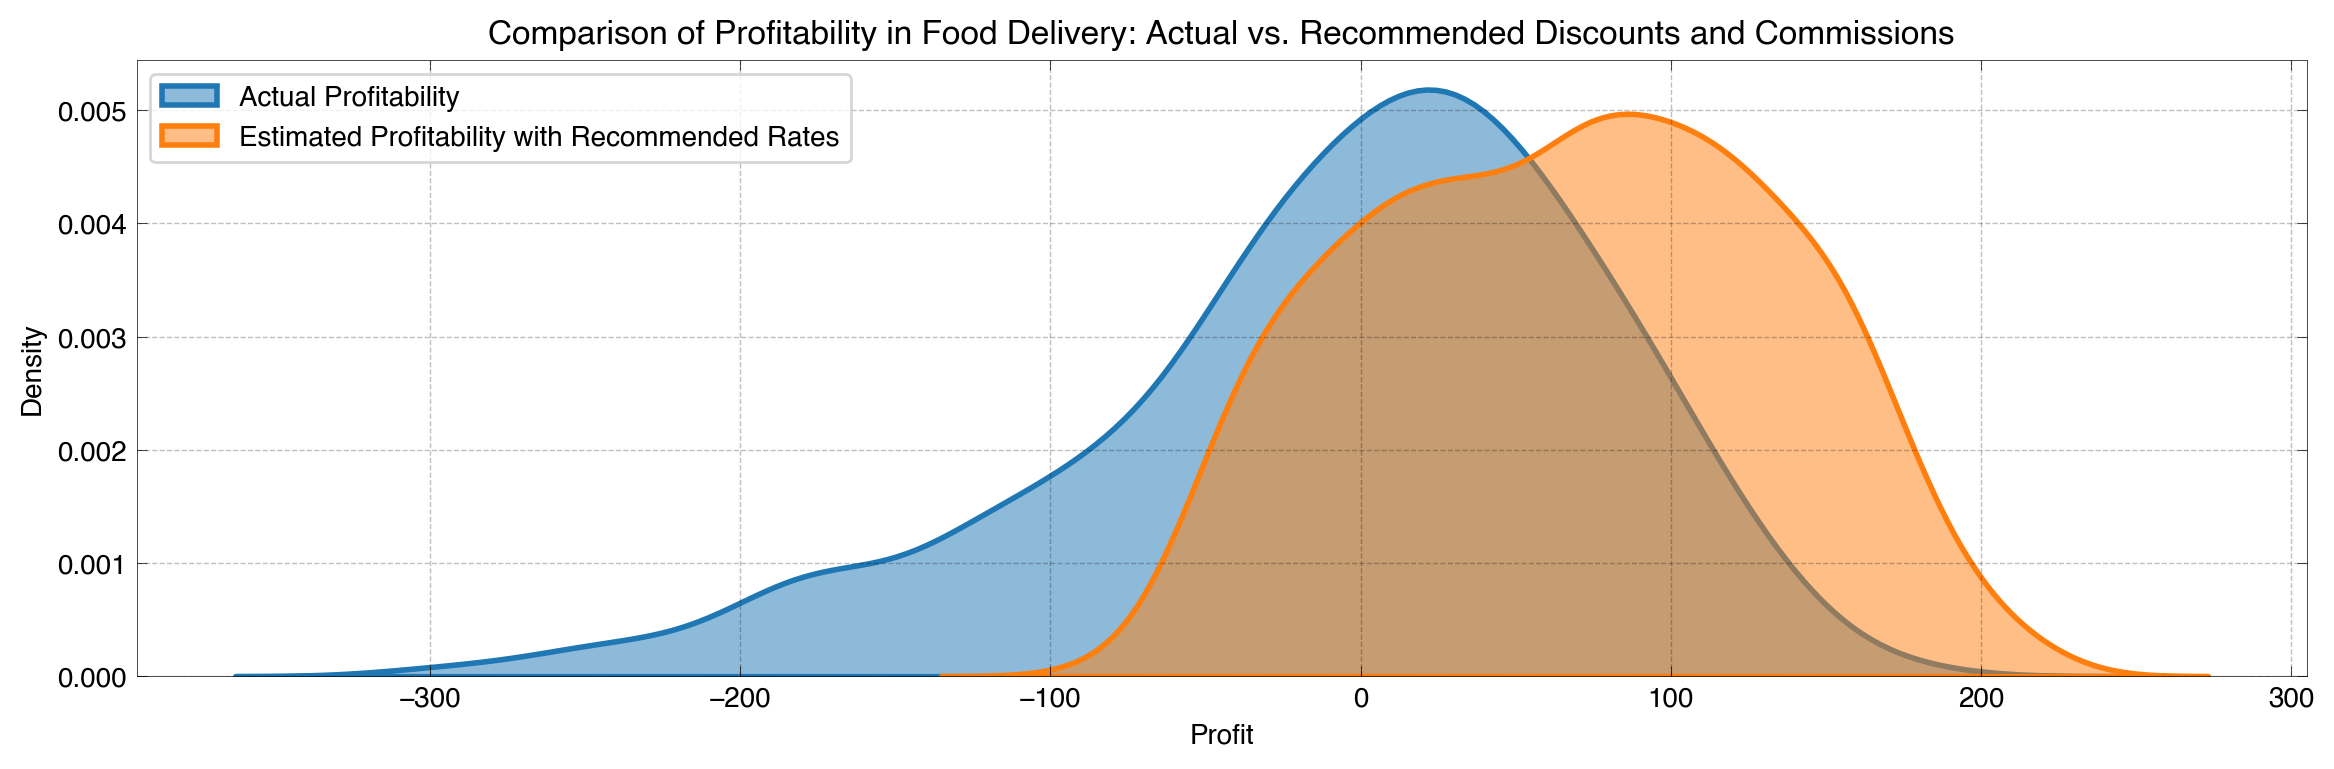

In [44]:
# simulate profitability with recommended discounts and commissions
recommended_commission_percentage = profit_com_percent.mean()
recommended_discount_percentage = profit_discounts_percent.mean()

# calculate the simulated commission fee and discount amount using recommended percentages
df['Simulated Commission Fee'] = df['Order Value'] * (recommended_commission_percentage / 100)
df['Simulated Discount Amount'] = df['Order Value'] * (recommended_discount_percentage / 100)

# recalculate total costs and profit with simulated values
df['Simulated Total Costs'] = (df['Delivery Fee'] +
                                        df['Payment Processing Fee'] +
                                        df['Simulated Discount Amount'])

df['Simulated Profit'] = (df['Simulated Commission Fee'] -
                                   df['Simulated Total Costs'])

# visualizing the comparison
plt.figure(figsize=(14, 4))

# actual profitability
sns.kdeplot(df['Profit'], label='Actual Profitability', fill=True, alpha=0.5, linewidth=2)

# simulated profitability
sns.kdeplot(df['Simulated Profit'], label='Estimated Profitability with Recommended Rates', fill=True, alpha=0.5, linewidth=2)

plt.title('Comparison of Profitability in Food Delivery: Actual vs. Recommended Discounts and Commissions')
plt.xlabel('Profit')
plt.ylabel('Density')
plt.legend(loc='upper left')
plt.show()

In [45]:
print(f"Simulated average profit: {df['Simulated Profit'].mean():.2f}")
print(f"Simulated average profit percentage: {df['Simulated Profit'].mean() / df['Simulated Total Costs'].mean() * 100:.2f}%")

Simulated average profit: 67.59
Simulated average profit percentage: 49.51%
